In [1]:
import numpy as np

In [2]:
import cv2 as cv2

In [3]:
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
import math

In [5]:
def showImage(imageForShowing):
    plt.figure(figsize = (10, 10))
    plt.imshow(imageForShowing, 'gray')

In [6]:
def showImages(image1, image2):
    f = plt.figure(figsize = (10, 10))
    f.add_subplot(1, 1, 1)
    plt.imshow(image1, 'gray')
    f.add_subplot(1, 1, 1)
    plt.imshow(image2, 'gray')
    plt.show(block=True)

In [7]:
img = cv2.imread("2.jpg", 0)

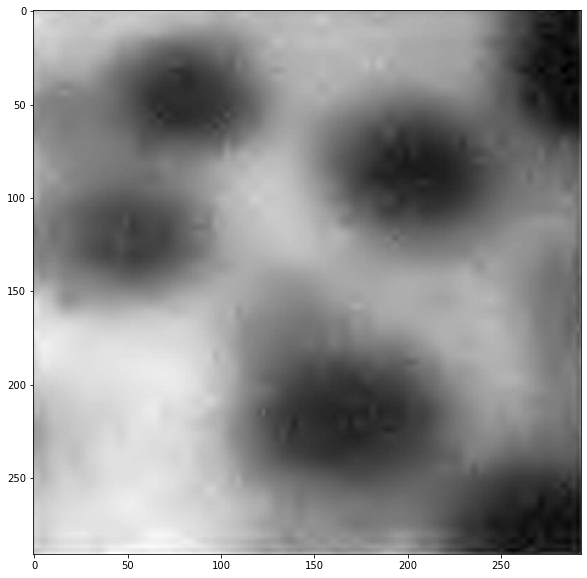

In [8]:
showImage(img)

In [9]:
imageShape = img.shape
print(imageShape)

(291, 293)


In [10]:
print(img)

[[125 127 128 ...  35  42  63]
 [128 131 132 ...  36  43  63]
 [133 136 136 ...  39  45  65]
 ...
 [124 129 129 ...  46  37  43]
 [125 128 130 ...  42  40  47]
 [130 133 136 ...  47  46  59]]


In [17]:
#Ядро сглаживающего фильтра
kernel = np.ones((10, 10),np.uint16) / 100
print(kernel)

[[0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]]


In [18]:
#Сглаживание определенным выше ядром
dst = cv2.filter2D(img, -1, kernel)

In [19]:
print(dst)

[[135 135 135 ...  41  41  40]
 [135 135 135 ...  41  41  40]
 [135 135 135 ...  41  41  40]
 ...
 [131 131 131 ...  41  42  43]
 [132 132 132 ...  42  43  44]
 [132 132 132 ...  43  44  44]]


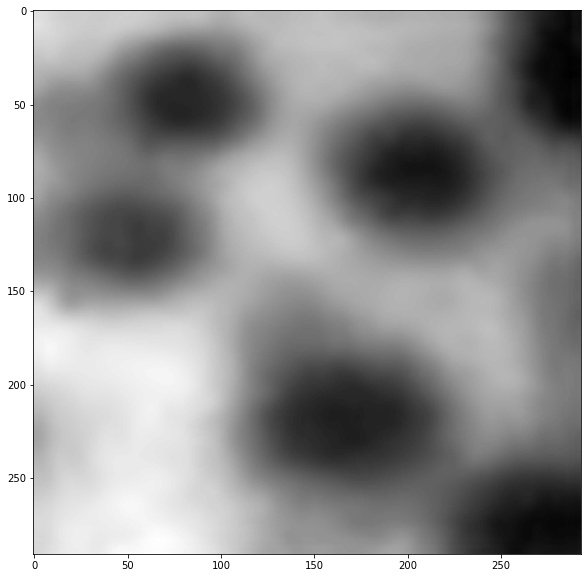

In [20]:
showImage(dst)

In [60]:
border, thresholdToBluredImage = cv2.threshold(dst, 75, 255, cv2.THRESH_BINARY_INV)

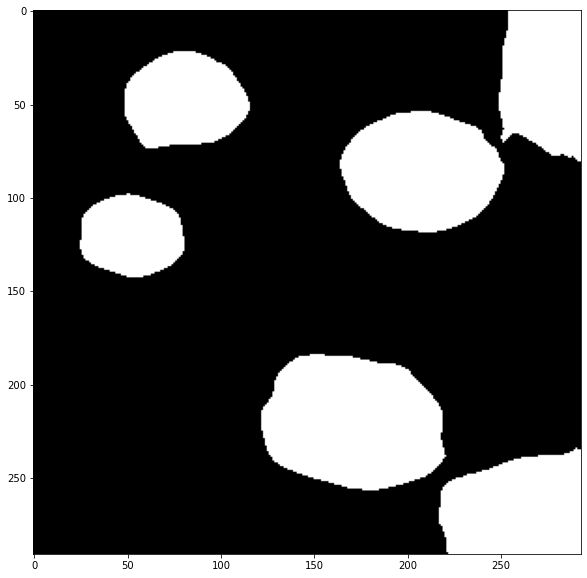

In [61]:
showImage(thresholdToBluredImage)

In [63]:
distanceTranformedImage = cv2.distanceTransform(thresholdToBluredImage, cv2.DIST_L2, 3)

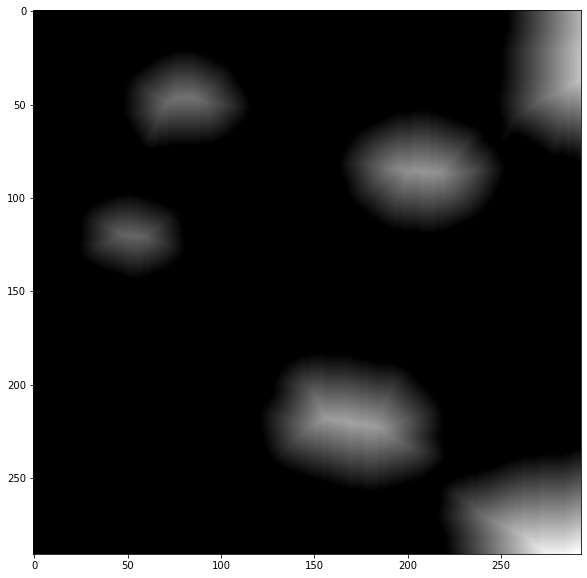

In [64]:
showImage(distanceTranformedImage)

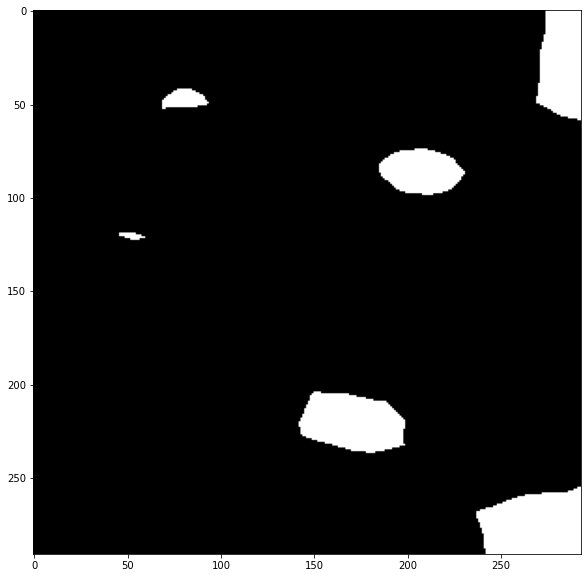

In [80]:
b, threshholdedImageAfterDT = cv2.threshold(distanceTranformedImage, 20, 255, cv2.THRESH_BINARY)
sure_fg = np.uint8(threshholdedImageAfterDT)
showImage(sure_fg)

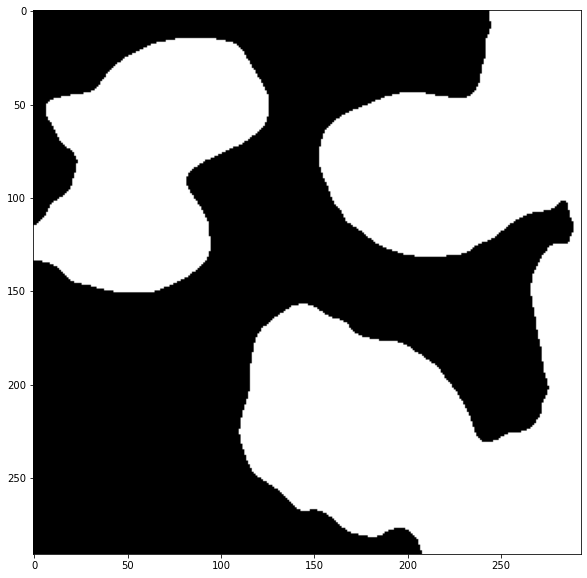

In [81]:
r, sure_bg = cv2.threshold(dst, 64, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
showImage(sure_bg)

In [82]:
print(sure_bg.dtype)
print(sure_fg.dtype)
unknown = cv2.subtract(sure_bg, sure_fg)
print(unknown.max())
print(unknown.min())
print(sure_bg.dtype)
print(sure_fg.dtype)

uint8
uint8
255
0
uint8
uint8


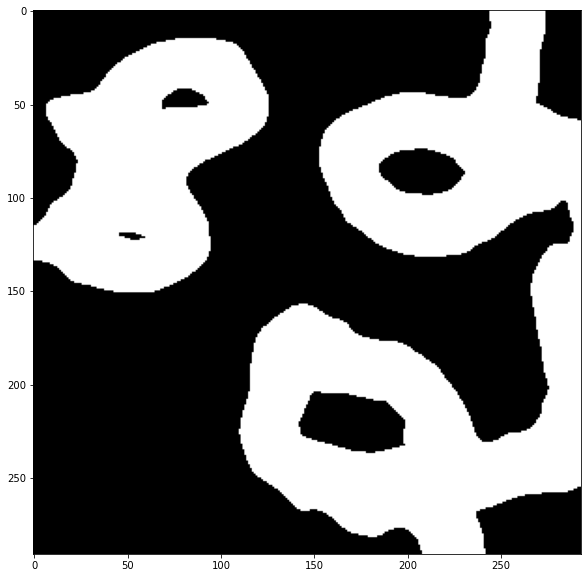

In [83]:
showImage(unknown)

In [84]:
#Маркируем известные области
ret, markers = cv2.connectedComponents(sure_fg)

In [85]:
#Добавляем 1 ко всем областям
markers = markers + 1

In [86]:
#Обнуляем значение интенсивности в неизвестной области
markers[unknown == 255] = 0

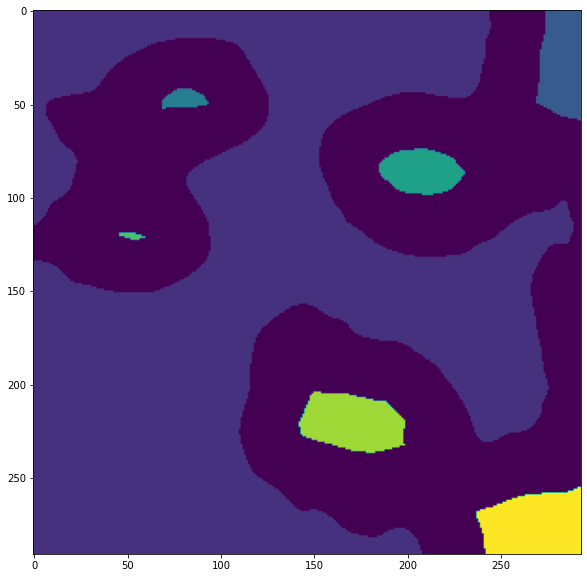

In [87]:
plt.figure(figsize = (10, 10))
plt.imshow(markers)

In [88]:
intDST = np.uint8(dst)
colorDST = cv2.cvtColor(intDST, cv2.COLOR_GRAY2RGB)
borders = cv2.watershed(colorDST, markers)

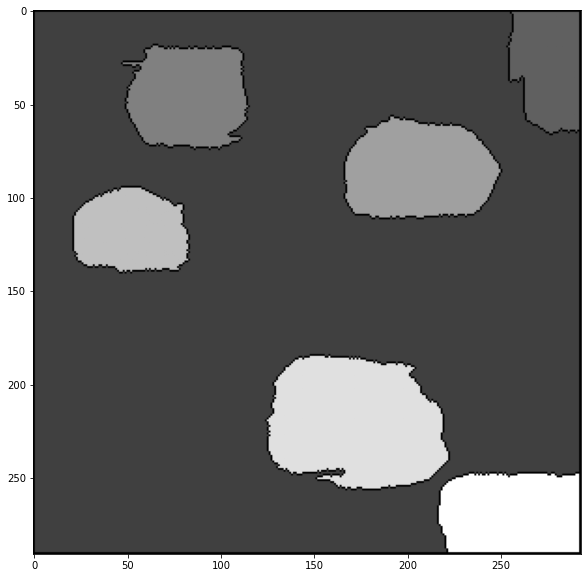

In [89]:
showImage(borders)

In [90]:
imageWithBorders = colorDST
imageWithBorders[borders == -1] = [255, 0, 0]

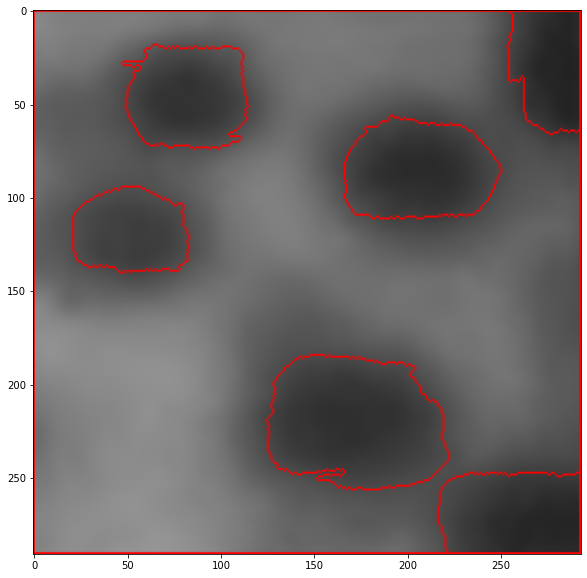

In [91]:
showImage(imageWithBorders)